<a href="https://colab.research.google.com/github/alexandre858/DataMinig/blob/main/Projet_suggestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
#Partie 1 du programme 
#Annotation et classification
import os,sys
import json
import pathlib
import pandas
from PIL import Image
import matplotlib.pyplot as plot
import numpy
import math
from sklearn.cluster import MiniBatchKMeans

try:
   os.mkdir('data')
except:
    pass


donnees={}


 
path = '.'
 
files = os.listdir(path+"/images")

i=1
for name in files:
  if os.path.isfile("images/"+name):
    
    imgfile = Image.open("images/"+name)

    #algoritme qui détermine la couleur dominante d'une image
    #---------------------------------------------------
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    if len(numarray.shape) ==2:

      cluster_count = 5

      clusters = MiniBatchKMeans(n_clusters = cluster_count)
      clusters.fit(numarray)

      npbins = numpy.arange(0, cluster_count + 1)
      histogram = numpy.histogram(clusters.labels_, bins=npbins)




      index_max=numpy.where(histogram[0]==max(histogram[0]))

      histogram[0][index_max]=0

      index_max=numpy.where(histogram[0]==max(histogram[0]))

      histogram[0][index_max]=0

      index_max_sec=numpy.where(histogram[0]==max(histogram[0]))

      col_dom_r=math.ceil(clusters.cluster_centers_[index_max[0][0]][0])
      col_dom_g=math.ceil(clusters.cluster_centers_[index_max[0][0]][1])
      col_dom_b=math.ceil(clusters.cluster_centers_[index_max[0][0]][2])
    
    
    
    else:
      col_dom_r=500
      col_dom_g=500
      col_dom_b=500

    #---------------------------------------------------

    #découpage et assosiation des couleurs à un interavl de couleur
    #---------------------------------------------------
    list_col=[col_dom_r,col_dom_g,col_dom_b]
    interval_r=0
    interval_g=0
    interval_b=0
    list_int_col=[interval_r,interval_g,interval_b]
    inter=[range(0,32),range(32,64),range(64,96),range(96,128),range(128,160),range(160,192),range(192,224),range(224,256)]

    for i in range (0,3):

      if (list_col[i] in inter[0]):
        list_int_col[i]=0
      elif (list_col[i] in inter[1]):
        list_int_col[i]=1
      elif (list_col[i] in inter[2]):
        list_int_col[i]=2
      elif (list_col[i] in inter[3]):
        list_int_col[i]=3   
      elif (list_col[i] in inter[4]):
        list_int_col[i]=4
      elif (list_col[i] in inter[5]):
        list_int_col[i]=5
      elif (list_col[i] in inter[6]):
        list_int_col[i]=6
      elif (list_col[i] in inter[7]):
        list_int_col[i]=7
      else:
        list_int_col[i]="NaN"


    #---------------------------------------------------

    #analyse taux de présence couleurs
    #---------------------------------------------------
    histogram = imgfile.histogram()
    if (len(histogram)==1024 or len(histogram)==768):

      red = histogram[0:255]
      green = histogram[256:511]
      blue = histogram[512:767]

      total_red=0
      total_blue=0
      total_green=0

      j=0
      while j <255:
        total_red=total_red+red[j]*j
        total_blue=total_blue+blue[j]*j
        total_green=total_green+green[j]*j
        j+=1

    else:
      total_red = 0
      total_green = 0
      total_blue = 0
    #---------------------------------------------------

    #récupération des données sur le format de l'image
    #---------------------------------------------------
    hauteur=imgfile.size[0]
    largeur=imgfile.size[1]
    format=imgfile.format
    #---------------------------------------------------

    #mise en place des données dans un fichier json
    #---------------------------------------------------
    dele=4
    if (imgfile.format=="JPEG"):
      dele=5


    donnees[name]={"name":name[:-dele],"size_high":hauteur,
                    "size_lenght":largeur,"format":format,
                      "red":total_red,"green":total_green,"blue":total_blue,
                        "col_dom_r":col_dom_r,"col_dom_g":col_dom_g,"col_dom_b":col_dom_b,
                          "int_col_dom_r":list_int_col[0],"int_col_dom_g":list_int_col[1],"int_col_dom_b":list_int_col[2]}


    i=i+1 

with open("data/data.json", "w") as file:
    json.dump(donnees, file,indent = 3)
#---------------------------------------------------







{'name': 'machamp', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 476186, 'green': 505308, 'blue': 517805, 'col_dom_r': 136, 'col_dom_g': 144, 'col_dom_b': 157, 'int_col_dom_r': 4, 'int_col_dom_g': 4, 'int_col_dom_b': 4}
{'name': 'magby', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 203414, 'green': 165516, 'blue': 168064, 'col_dom_r': 234, 'col_dom_g': 121, 'col_dom_b': 116, 'int_col_dom_r': 7, 'int_col_dom_g': 3, 'int_col_dom_b': 3}
{'name': 'lunatone', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 0, 'green': 0, 'blue': 0, 'col_dom_r': 500, 'col_dom_g': 500, 'col_dom_b': 500, 'int_col_dom_r': 'NaN', 'int_col_dom_g': 'NaN', 'int_col_dom_b': 'NaN'}
{'name': 'luranti', 'size_high': 120, 'size_lenght': 120, 'format': 'JPEG', 'red': 794401, 'green': 751778, 'blue': 699576, 'col_dom_r': 239, 'col_dom_g': 134, 'col_dom_b': 153, 'int_col_dom_r': 7, 'int_col_dom_g': 4, 'int_col_dom_b': 4}
{'name': 'machop', 'size_high': 120, 'size_lenght': 120

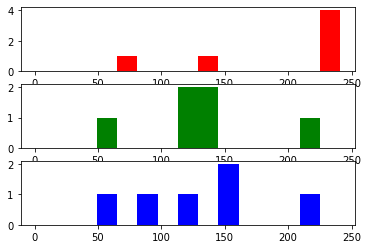

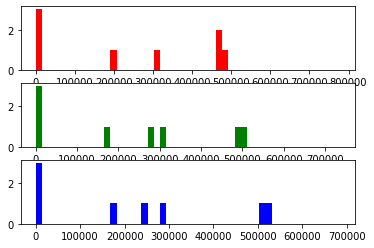

In [22]:
#visualisation
import matplotlib.pyplot as plot
import math
import json

jsondata = json.load(open('data/data.json'))
list_col = ["col_dom_r","col_dom_g","col_dom_b","red","green","blue"]

list_dom_r=[]
list_dom_g=[]
list_dom_b=[]

list_r=[]
list_g=[]
list_b=[]

list_list=[list_dom_r,list_dom_g,list_dom_b,list_r,list_g,list_b]

for data in jsondata:
  print(jsondata[data])
  for i in range (0,6):

    list_list[i].append(jsondata[data][list_col[i]])

print(list_list[3])
fig, axs = plot.subplots(3)
axs[0].hist(list_list[0],range(1,256,16),color='red')
axs[1].hist(list_list[1],range(1,256,16),color='green')
axs[2].hist(list_list[2],range(1,256,16),color='blue')
plot.show()
fig, axes = plot.subplots(3)
axes[0].hist(list_list[3],range(min(list_list[3]),max(list_list[3]),math.ceil((max(list_list[3])-min(list_list[3]))/50)),color='red')
axes[1].hist(list_list[4],range(min(list_list[4]),max(list_list[4]),math.ceil((max(list_list[4])-min(list_list[4]))/50)),color='green')
axes[2].hist(list_list[5],range(min(list_list[5]),max(list_list[5]),math.ceil((max(list_list[5])-min(list_list[5]))/50)),color='blue')
plot.show()

In [ ]:
#test découpage couleur

import os,sys
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans


path = '.'
 
files = os.listdir(path+"/images_test")

i=1
for name in files:
  if os.path.isfile("images_test/"+name):
    imgfile = Image.open("images_test/"+name)
    #numarray=numpy.zeros((imgfile.size[0]*imgfile.size[1],4))
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    if (len(numarray.shape)==2):




      cluster_count = 4
      clusters = MiniBatchKMeans(n_clusters = cluster_count)

      clusters.fit(numarray)

      npbins = numpy.arange(0, cluster_count+1 )
      histogram = numpy.histogram(clusters.labels_, bins=npbins)

      index_max=numpy.where(histogram[0]==max(histogram[0]))

      #print(histogram[0],index_max)

      histogram[0][index_max]=0

      index_max=numpy.where(histogram[0]==max(histogram[0]))


      #print(histogram[0],index_max)


    #print(histogram[0],index_max_sec)

    #print(clusters.cluster_centers_,index_max)

      col_dom_r = math.ceil(clusters.cluster_centers_[index_max[0][0]][0])
      col_dom_g = math.ceil(clusters.cluster_centers_[index_max[0][0]][1]) 
      col_dom_b = math.ceil(clusters.cluster_centers_[index_max[0][0]][2]) 
    else:
      col_dom_r =500
      col_dom_g =500
      col_dom_b =500

    list_col=[col_dom_r,col_dom_g,col_dom_b]
    interval_r=0
    interval_g=0
    interval_b=0
    list_int_col=[interval_r,interval_g,interval_b]
    inter=[range(0,32),range(32,64),range(64,96),range(96,128),range(128,160),range(160,192),range(192,224),range(224,256)]

    for i in range (0,3):

      if (list_col[i] in inter[0]):
        list_int_col[i]=0
      elif (list_col[i] in inter[1]):
        list_int_col[i]=1
      elif (list_col[i] in inter[2]):
        list_int_col[i]=2
      elif (list_col[i] in inter[3]):
        list_int_col[i]=3   
      elif (list_col[i] in inter[4]):
        list_int_col[i]=4
      elif (list_col[i] in inter[5]):
        list_int_col[i]=5
      elif (list_col[i] in inter[6]):
        list_int_col[i]=6
      elif (list_col[i] in inter[7]):
        list_int_col[i]=7
      else:
        list_int_col[i]="NaN"
    print(list_col,list_int_col)


[500, 500, 500] ['NaN', 'NaN', 'NaN']
[235, 135, 153] [7, 4, 4]
[71, 66, 61] [2, 2, 1]
[218, 207, 199] [6, 6, 6]


In [ ]:
#test taux de presence
from PIL import Image
import matplotlib.pyplot as plot

path = '.'
 
files = os.listdir(path+"/images_test")

for name in files:
  if os.path.isfile("images_test/"+name):

imgfile = Image.open("./images/archeops.png")


histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]

total_red=0
total_blue=0
total_green=0

i=0
while i <255:
  total_red=total_red+red[i]*i
  total_blue=total_blue+blue[i]*i
  total_green=total_green+green[i]*i
  i+=1


print(total_red,total_blue,total_green)





 

334382 511705 574290


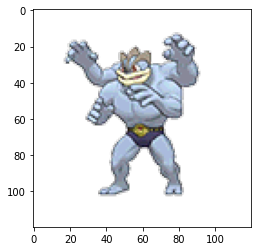

Entrez 1 si vous aimez, ou 0 si non : 1
{'name': 'machamp', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 476186, 'green': 505308, 'blue': 517805, 'col_dom_r': 136, 'col_dom_g': 144, 'col_dom_b': 157, 'int_col_dom_r': 4, 'int_col_dom_g': 4, 'int_col_dom_b': 4, 'liked': 1}


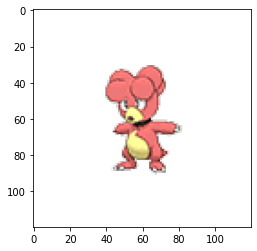

Entrez 1 si vous aimez, ou 0 si non : 0
{'name': 'magby', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 203414, 'green': 165516, 'blue': 168064, 'col_dom_r': 234, 'col_dom_g': 121, 'col_dom_b': 116, 'int_col_dom_r': 7, 'int_col_dom_g': 3, 'int_col_dom_b': 3, 'liked': 0}


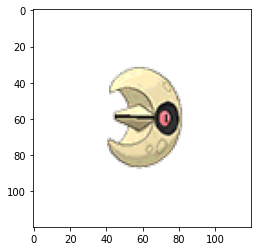

Entrez 1 si vous aimez, ou 0 si non : 0
{'name': 'lunatone', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 0, 'green': 0, 'blue': 0, 'col_dom_r': 500, 'col_dom_g': 500, 'col_dom_b': 500, 'int_col_dom_r': 'NaN', 'int_col_dom_g': 'NaN', 'int_col_dom_b': 'NaN', 'liked': 0}


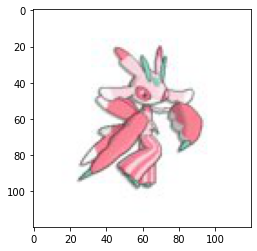

Entrez 1 si vous aimez, ou 0 si non : 1
{'name': 'luranti', 'size_high': 120, 'size_lenght': 120, 'format': 'JPEG', 'red': 794401, 'green': 751778, 'blue': 699576, 'col_dom_r': 239, 'col_dom_g': 134, 'col_dom_b': 153, 'int_col_dom_r': 7, 'int_col_dom_g': 4, 'int_col_dom_b': 4, 'liked': 1}


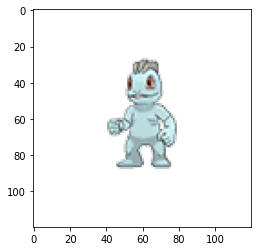

Entrez 1 si vous aimez, ou 0 si non : 1
{'name': 'machop', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 0, 'green': 0, 'blue': 0, 'col_dom_r': 500, 'col_dom_g': 500, 'col_dom_b': 500, 'int_col_dom_r': 'NaN', 'int_col_dom_g': 'NaN', 'int_col_dom_b': 'NaN', 'liked': 1}


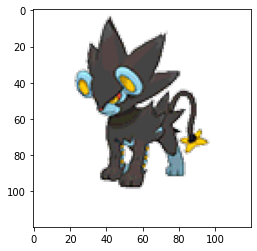

Entrez 1 si vous aimez, ou 0 si non : 1
{'name': 'luxray', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 303379, 'green': 314321, 'blue': 281585, 'col_dom_r': 67, 'col_dom_g': 63, 'col_dom_b': 62, 'int_col_dom_r': 2, 'int_col_dom_g': 1, 'int_col_dom_b': 1, 'liked': 1}


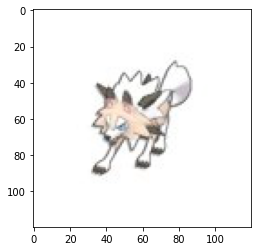

Entrez 1 si vous aimez, ou 0 si non : 0
{'name': 'lycanroc-midda', 'size_high': 120, 'size_lenght': 120, 'format': 'JPEG', 'red': 486817, 'green': 485032, 'blue': 517297, 'col_dom_r': 233, 'col_dom_g': 222, 'col_dom_b': 213, 'int_col_dom_r': 7, 'int_col_dom_g': 6, 'int_col_dom_b': 6, 'liked': 0}


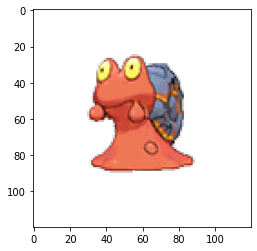

Entrez 1 si vous aimez, ou 0 si non : 0
{'name': 'magcargo', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 464376, 'green': 285387, 'blue': 246072, 'col_dom_r': 233, 'col_dom_g': 117, 'col_dom_b': 81, 'int_col_dom_r': 7, 'int_col_dom_g': 3, 'int_col_dom_b': 2, 'liked': 0}


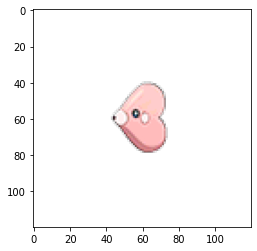

Entrez 1 si vous aimez, ou 0 si non : 0
{'name': 'luvdisc', 'size_high': 120, 'size_lenght': 120, 'format': 'PNG', 'red': 0, 'green': 0, 'blue': 0, 'col_dom_r': 500, 'col_dom_g': 500, 'col_dom_b': 500, 'int_col_dom_r': 'NaN', 'int_col_dom_g': 'NaN', 'int_col_dom_b': 'NaN', 'liked': 0}


In [41]:
#algorithme like image
from PIL import Image
import matplotlib.pyplot as plot
import matplotlib.image as mpimg
import json

manual_choice=0

try:
   os.mkdir('data')
except:
    pass

path='.'
files = os.listdir(path+"/images")

#database
jsondata = json.load(open('data/data.json'))

donnees=jsondata
with open("data/data_liked.json", "w") as file:
    json.dump(donnees, file,indent = 3)

for name in files:
  if os.path.isfile("images/"+name):
    img = mpimg.imread("images/"+name)
    imgplot = plot.imshow(img)
    plot.show()
    n=int(input("Entrez 1 si vous aimez, ou 0 si non : "))
    jsondata[name]["liked"]=n
    print (jsondata[name])
donnees=jsondata
with open("data/data_liked.json", "w") as file:
    json.dump(donnees, file,indent = 3)

In [ ]:
#test kmeans
import os,sys
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans


path = '.'
 
files = os.listdir(path+"/images_test")

i=1
for name in files:
  if os.path.isfile("images_test/"+name):
    imgfile = Image.open("images_test/"+name)
    #numarray=numpy.zeros((imgfile.size[0]*imgfile.size[1],4))
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    if (len(numarray.shape)==2):




      cluster_count = 4
      clusters = MiniBatchKMeans(n_clusters = cluster_count)

      clusters.fit(numarray)

      npbins = numpy.arange(0, cluster_count+1 )
      histogram = numpy.histogram(clusters.labels_, bins=npbins)

      index_max=numpy.where(histogram[0]==max(histogram[0]))

      #print(histogram[0],index_max)

      histogram[0][index_max]=0

      index_max=numpy.where(histogram[0]==max(histogram[0]))


      #print(histogram[0],index_max)


    #print(histogram[0],index_max_sec)

    #print(clusters.cluster_centers_,index_max)

      col_dom_r = math.ceil(clusters.cluster_centers_[index_max[0][0]][0])
      col_dom_g = math.ceil(clusters.cluster_centers_[index_max[0][0]][1]) 
      col_dom_b = math.ceil(clusters.cluster_centers_[index_max[0][0]][2]) 
      
      co




MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
MiniBatchKMeans(n_clusters=4)
